# COSI148B Homework 3 Nicole Meng

 In this assignment, you are asked to build a model for detecting fraud transactions. There are two data files "HW3_training.csv" and "HW3_test_input.csv" in the attached "HW3_data.zip". The first row in each data file is the header. Each of the rest rows is a sample. You should use "HW3_training.csv" to build your model and then apply your model to make predictions for the samples in "HW3_test_input.csv". Save your predictions in a file "HW3_test_output.csv", in which each row is the prediction of the corresponding row in "HW3_test_input.csv". You should only use the models we have covered in our class so far: linear regression, logistic regression, K-NN, and trees.

## Data Loading and Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# read the CSV file into a pandas DataFrame
train = pd.read_csv('HW3_training.csv')
test = pd.read_csv('HW3_test_input.csv')

# print the column names and their data types
print(train.dtypes)

# print summary statistics for each numeric column
print("\n", train.describe())

# print the number of samples
print("\nThe total number of samples:", len(train))

type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

              amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count  6.289710e+05   6.289710e+05    6.289710e+05    6.289710e+05   
mean   1.588842e+05   8.741938e+05    8.936291e+05    9.770030e+05   
std    2.669073e+05   2.979031e+06    3.015351e+06    2.293012e+06   
min    2.600000e-01   0.000000e+00    0.000000e+00    0.000000e+00   
25%    1.213569e+04   0.000000e+00    0.000000e+00    0.000000e+00   
50%    7.648334e+04   1.601244e+04    0.000000e+00    1.267461e+05   
75%    2.136965e+05   1.358090e+05    1.737266e+05    9.147774e+05   
max    1.000000e+07   3.840000e+07    3.860000e+07    4.140000e+07   

       newbalanceDest        isFraud  
count    6.289710e+05  628971.000000  
mean     1.113246e+06       0.001450  
std      2.413572e+06       0.038051  
min      0.0000

In [2]:
# process trasaction types and delete ones that don't make sense
types = train['type']

types_d = {}
for t in types: 
    if t not in types_d: 
        types_d[t] = 1
    else:
        types_d[t] += 1
print('There are 5 types of transactions:', types_d)

There are 5 types of transactions: {'CASH_OUT': 224635, 'CASH_IN': 136045, 'PAYMENT': 212043, 'TRANSFER': 51973, 'DEBIT': 4275}


In [3]:
# Check for missing values
print(train.isnull().sum())

# Remove any rows with missing values
train = train.dropna()
print('\nMissing value rows removed')


# Feature engineering
train['orig_diff'] = train['newbalanceOrig'] - train['oldbalanceOrg']
train['dest_diff'] = train['newbalanceDest'] - train['oldbalanceDest']


# Separate features and target variable
X = train.drop('isFraud', axis=1)
y = train['isFraud']

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

Missing value rows removed


In [4]:
# One-hot encode categorical features
cat_cols = ['type'] 
X = pd.get_dummies(X, columns=cat_cols)

## Data Split for Cross Validation

In [5]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

Accuracy: 0.9994196907667237
Precision: 0.7931034482758621
F1 score: 0.8344671201814059


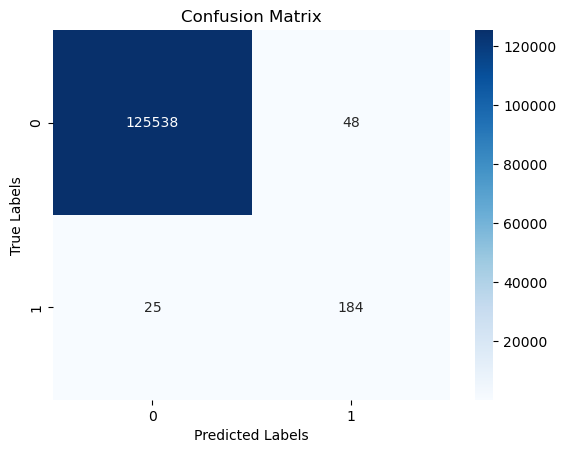

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Choose a logistic algorithm and train the model
logr = LogisticRegression()
logr.fit(X_train, y_train)

# Evaluate the model
y_pred = logr.predict(X_test)
print('Accuracy:', logr.score(X_test, y_test))
print('Precision:', precision_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Linear Regression

Linear Regression model:
Accuracy: 0.9984578083389641
Precision: 1.0
F1 score: 0.13392857142857142


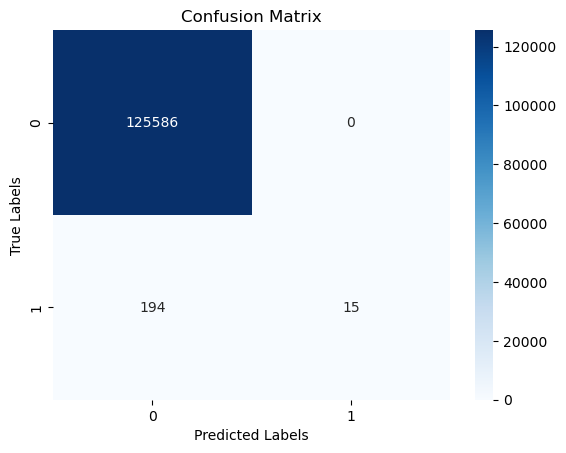

In [7]:
from sklearn.linear_model import LinearRegression

# Choose a linear algorithm and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate the model
y_pred = lr.predict(X_test)
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]
print('Linear Regression model:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# KNN

KNN model:
Accuracy: 0.9991096625462061
Precision: 0.8439716312056738
F1 score: 0.68


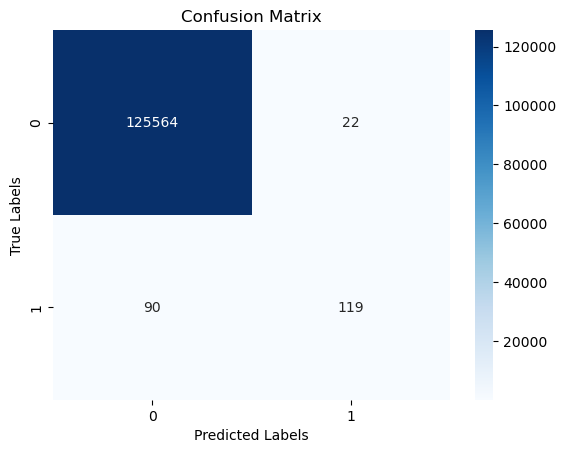

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the model
y_pred = knn.predict(X_test)
print('KNN model:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Decision Tree

Decision Tree model:
Accuracy: 0.9993401963512063
Precision: 0.8088235294117647
F1 score: 0.7990314769975787


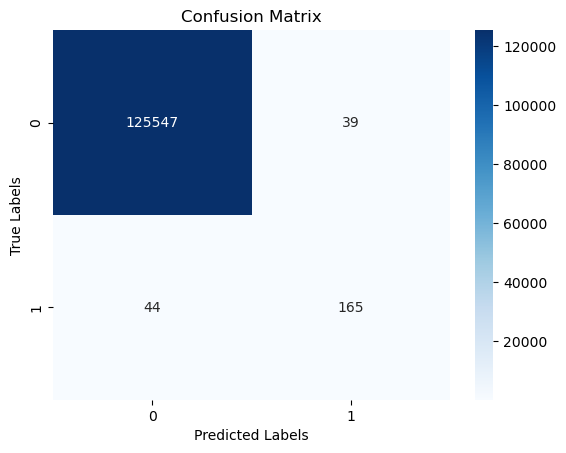

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Evaluate the model
y_pred = dt.predict(X_test)
print('Decision Tree model:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Decision Tree model with hyperparameters:
Accuracy: 0.9994276402082753
Precision: 0.9477124183006536
F1 score: 0.8011049723756906


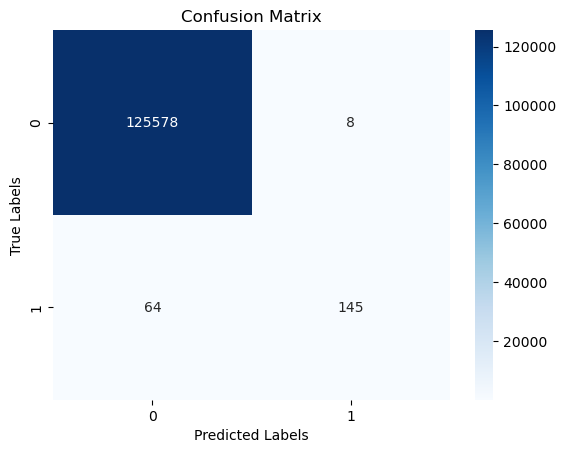

In [10]:
# Decision Tree model with hyperparameters
dt1 = DecisionTreeClassifier(max_depth=9, min_samples_split=10, min_samples_leaf=5, criterion='entropy')
dt1.fit(X_train, y_train)

# Evaluate the model
y_pred = dt1.predict(X_test)
print('Decision Tree model with hyperparameters:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Chosen Model: Decision Tree with Hyperparameter.
## Make Final Prediction

In [11]:
# Feature engineering
test['orig_diff'] = test['newbalanceOrig'] - test['oldbalanceOrg']
test['dest_diff'] = test['newbalanceDest'] - test['oldbalanceDest']

# One-hot encode categorical features
cat_cols = ['type']  
test = pd.get_dummies(test, columns=cat_cols)

test.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,orig_diff,dest_diff,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,119240.82,0.0,0.00,188216.08,296238.92,0.00,108022.84,0,1,0,0,0
1,2799.78,48932.0,46132.22,0.00,0.00,-2799.78,0.00,0,0,0,1,0
2,134843.00,21278.0,0.00,0.00,134843.00,-21278.00,134843.00,0,1,0,0,0
3,631622.55,0.0,0.00,2708960.94,3793415.70,0.00,1084454.76,0,0,0,0,1
4,135241.51,0.0,0.00,2448960.30,2584201.81,0.00,135241.51,0,1,0,0,0


In [12]:
final_pred = dt1.predict(test)

final_pred = np.array(final_pred)
df = pd.DataFrame({'isFraud': final_pred})

# Save the dataframe to a CSV file named 'HW3_test_output.csv'
df.to_csv('HW3_test_output.csv', index=False)